In [1]:
import sys
 
# setting path
sys.path.append('../')

import pydicom

from utils.display import display_dicom

In [2]:
sample_dcm_path = "/home/r079a/Desktop/de-identification/dataset/midi-test-data/input_data_half/2960208962/1.1.649.1.2.3308207.4.515.1957801984695464146/1.1.649.1.2.3308207.4.515.2638110164847693455/00000002.dcm"

In [3]:
ds = pydicom.dcmread(sample_dcm_path)

In [4]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 176
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 3.3.808.0.1.9977466.3.447.7011891717576758900
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 3.3.808.0.1.9977466.3.447.7011891717576758900
(0008, 0020) Study Date                          DA: '20140307'
(000

In [5]:
for element in ds.elements():
    if element.VR == 'OW':
        print(element.tag, element.name)
        # print(element.value)

(7fe0, 0010) Pixel Data


In [6]:
print(ds.pixel_array.shape)

(256, 256)


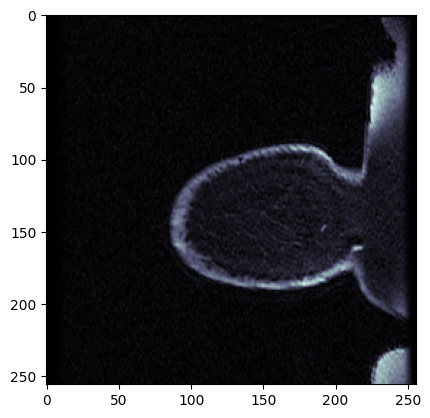

In [7]:
display_dicom(ds)

In [8]:
from dcm_anonymizers.phi_detectors import DcmRobustPHIDetector
from dcm_anonymizers.img_anonymizers import DCMImageAnonymizer
from dcm_anonymizers.tcia_deid import DCMTCIAAnonymizer
from dcm_anonymizers.private_tags_extractor import PrivateTagsExtractorV2

In [9]:
phi_detector = DcmRobustPHIDetector(logging=False)
# img_anonymizer = DCMImageAnonymizer(phi_detector=phi_detector)

ptags_extr = PrivateTagsExtractorV2(private_tags_dict_path='../dcm_anonymizers/tcia_private_tags_dict.json')
anonymizer = DCMTCIAAnonymizer(
    phi_detector=None,
    notes_phi_detector=phi_detector,
    soft_detection=True,
    private_tags_extractor=ptags_extr,
    rules_json_path='../dcm_anonymizers/tcia_deid_attrs.json'
)

[2024-09-04 18:39:00,848] [   DEBUG] ps_3_3.py:97 - PS3.3 init
[2024-09-04 18:39:00,849] [   DEBUG] tcia_deid.py:67 - TCIA anonymizer init


In [10]:
# changed = img_anonymizer.anonymize_dicom_image_data(ds)
# print(changed)

In [11]:
# display_dicom(ds)

In [12]:
anonymizer.anonymize_dataset(ds)

['(0117,ucsf birp private creator 011710xx,c5)_UN', '(0117,geiis,c5)_UN', '(0117,gems_parm_01,c5)_UN', '(0117,gems_imps_01,c5)_UN', '(0117,gems_imag_01,c5)_UN', '(0117,gems_sers_01,c5)_UN', '(0117,gems_stdy_01,c5)_UN', '(0117,gems_rela_01,c5)_UN', '(0117,gems_acqu_01,c5)_UN', '(0117,gems_pati_01,c5)_UN', '(0117,geiis,c5)_UN', '(0117,gems_iden_01,c5)_UN']
(0117, 10c5) Private tag data                    VR.UN: b'NO'
Warning!!! '(0117,gems_iden_01,c5)_UN': Private tag data not found in private tags dictionary
